# TP 3 - Histogramas y Luminancia

In [1]:
%reset
%matplotlib inline

# Importamos numpy (libreria de calculo) y le asignamos el nombre "np"
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

import time

import sys, os
sys.path.insert(0, 'Libreria')

import espacios_color as espc
import suma_y_resta as syr
import OpsHistLum as ophl


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
TEST_FOLDER = './Imagenes'
OUT_FOLDER = './Salidas'
TEST_IMAGE = 'spacex-rocket-pictures.jpg'
ALPHA_VAL = 0.5
BETA_VAL = 1.2
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)

imag_ini = ndimage.imread(nom_arch, flatten=False, mode='RGB')

# Paso a YIQ
imag_yiq = espc.rgb2yiq(imag_ini)

/home/rgrodriguez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


# Histogramas

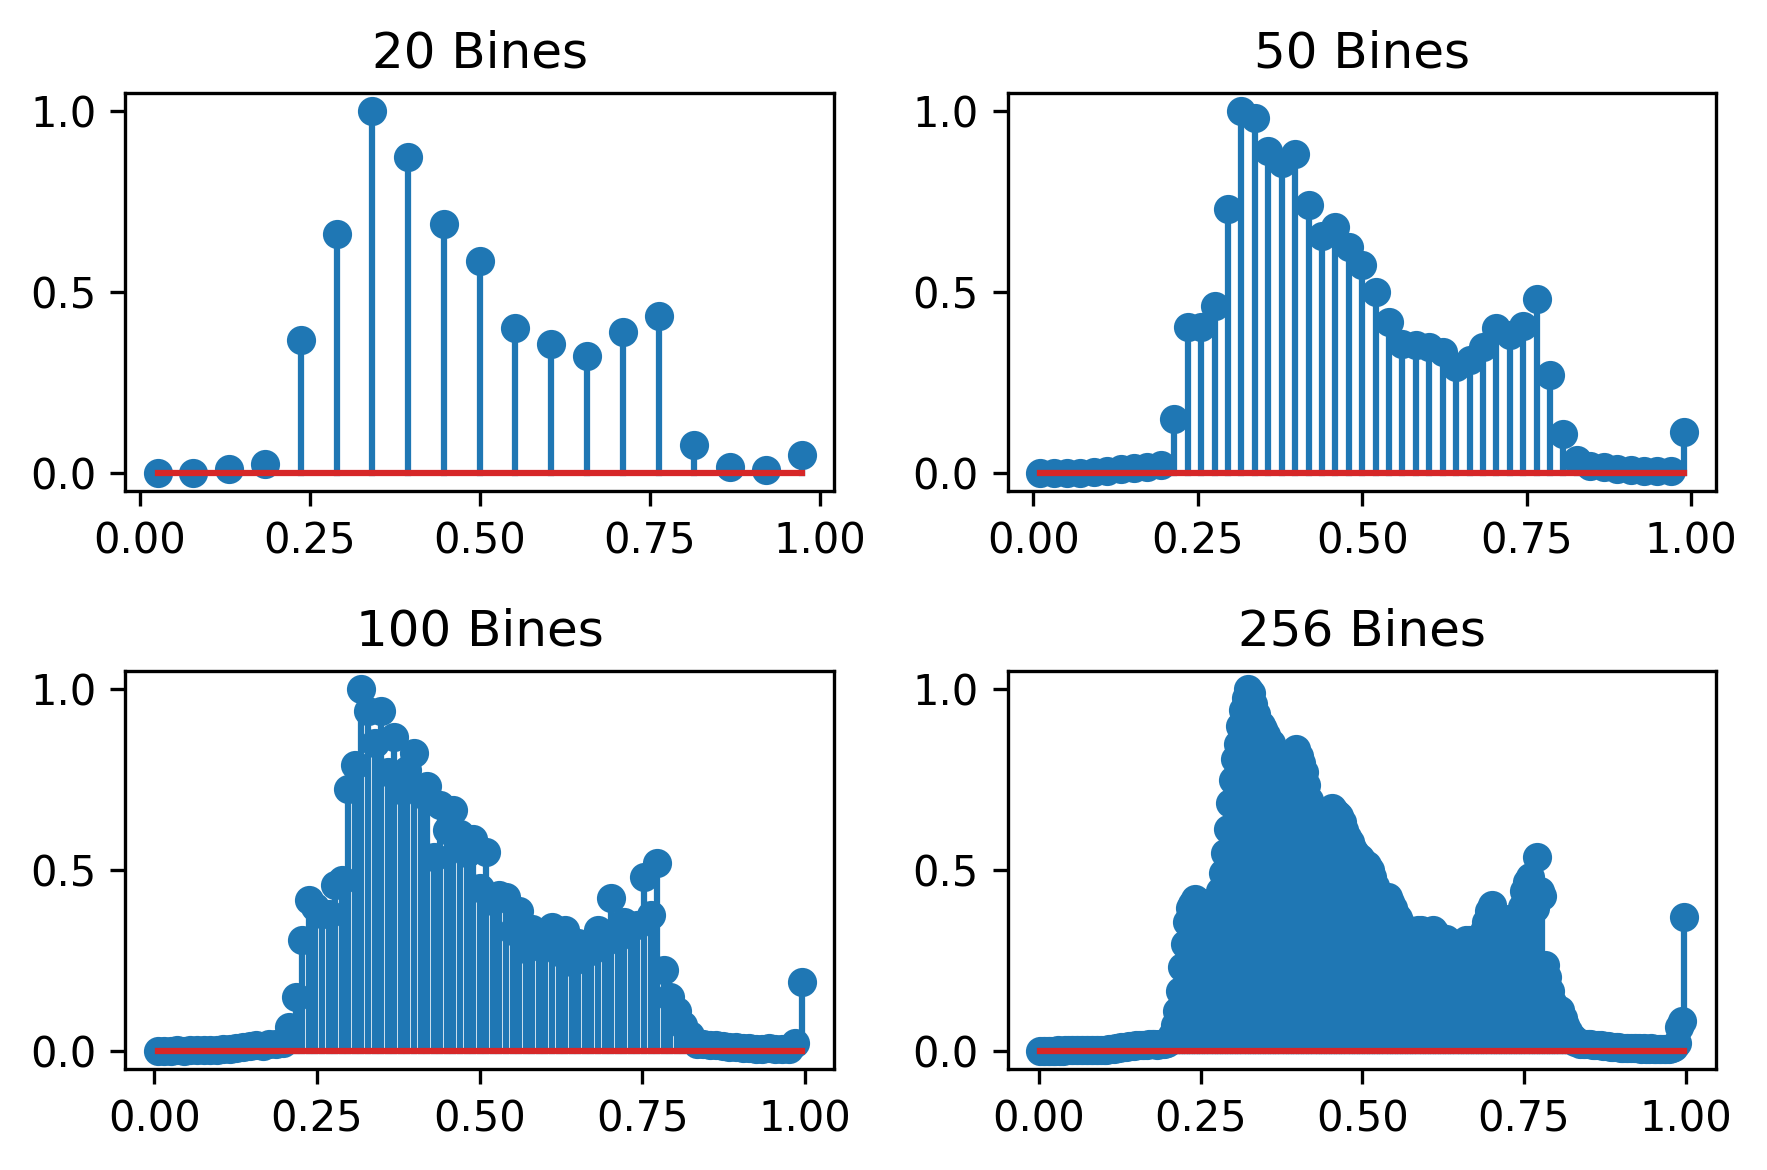

In [3]:
plt.figure(dpi=300)

bines_use = [20, 50, 100, 256]

for i in range(4):
    
    hist, bines = ophl.histogramear(imag_yiq, bines_use[i], normalizar = True)

    ax = plt.subplot(2,2,i+1)
    ax.stem(bines, hist)
    plt.title('%d Bines'%bines_use[i])
    
plt.tight_layout()

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP3_histogramas.png')
plt.savefig(nom_arch)

plt.show()

# Raiz y Cuadrado

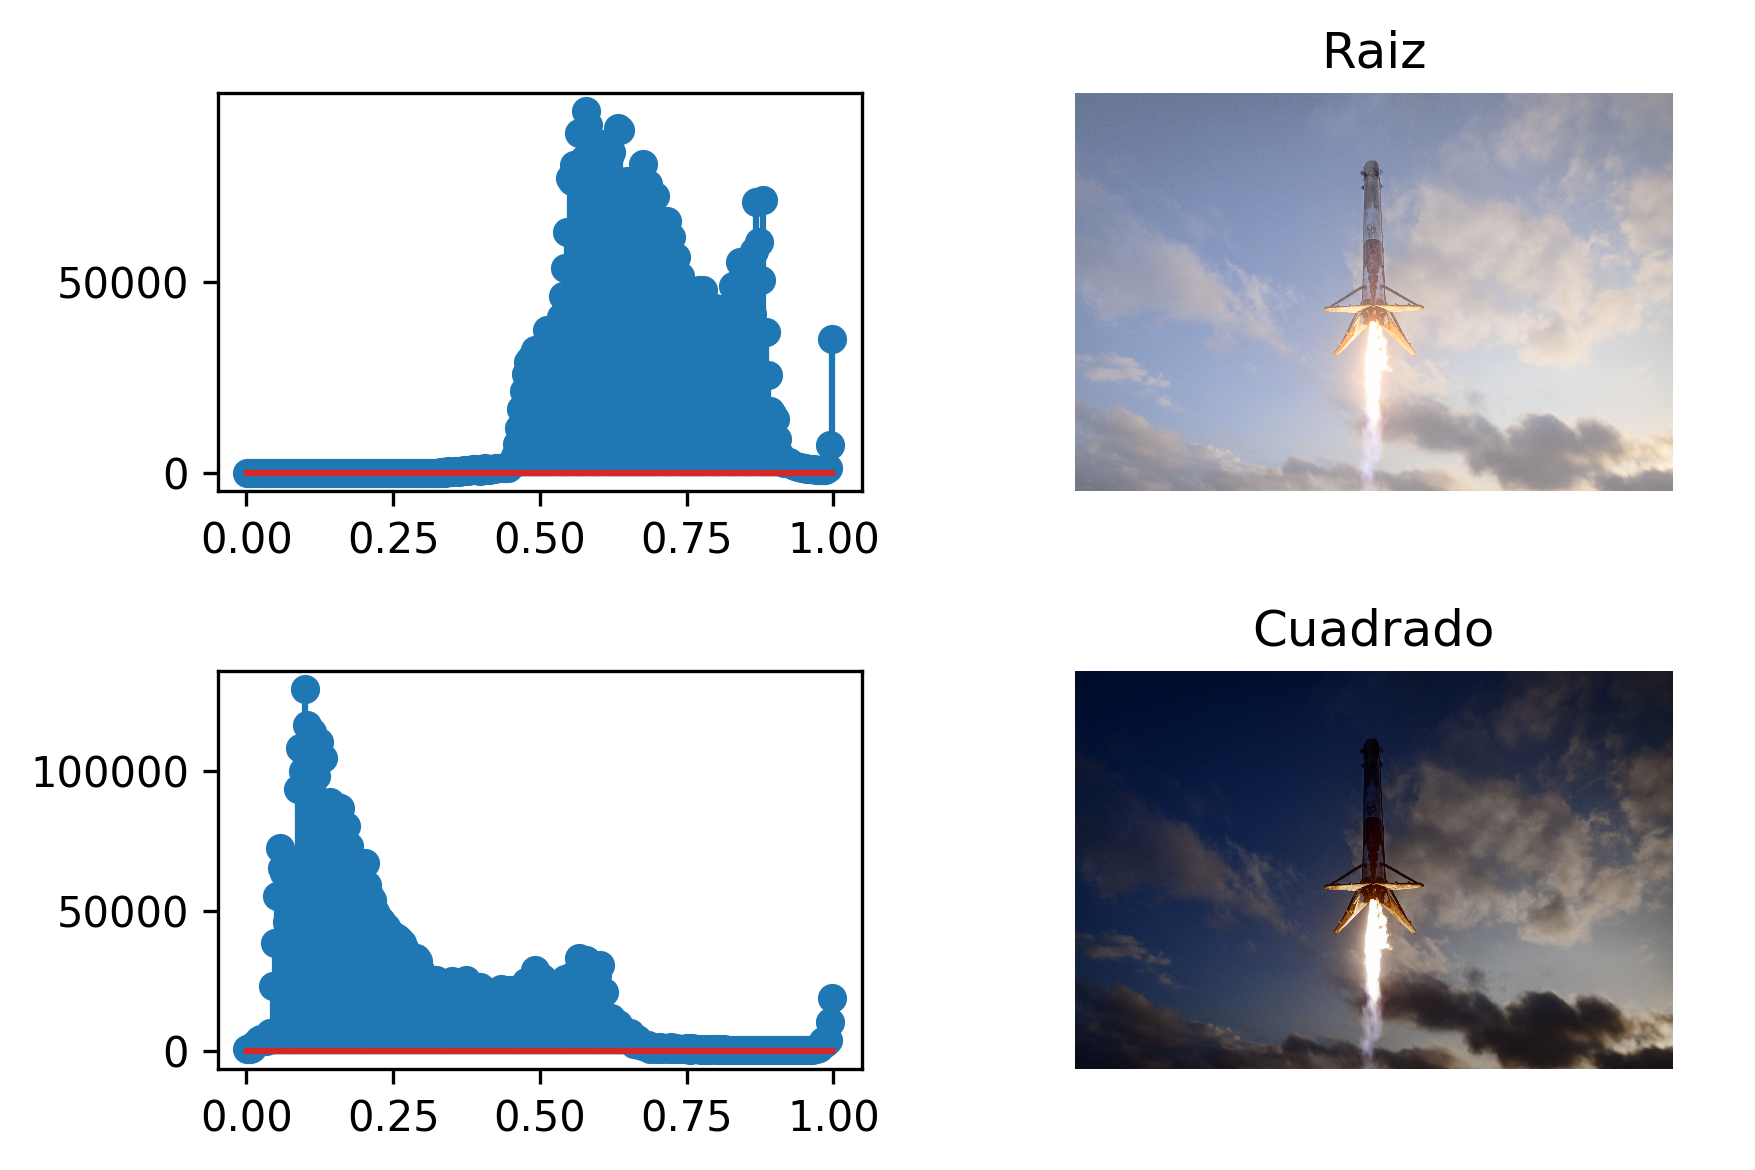

In [4]:
bines_use = 256

imag_yiq_sqrt = ophl.transform_sqrt(imag_yiq)
imag_yiq_pow = ophl.transform_pow(imag_yiq)

plt.figure(dpi=300)
ax = plt.subplot(2,2,1)
hist, bines = ophl.histogramear(imag_yiq_sqrt, bines_use)
ax.stem(bines, hist)
ax = plt.subplot(2,2,2)
imag_yiq_sqrt_RGB = espc.yiq2rgb(imag_yiq_sqrt)
ax.imshow(imag_yiq_sqrt_RGB)
plt.axis('off')
plt.title('Raiz')
ax = plt.subplot(2,2,3)
hist, bines = ophl.histogramear(imag_yiq_pow, bines_use)
ax.stem(bines, hist)
ax = plt.subplot(2,2,4)
imag_yiq_pow_RGB = espc.yiq2rgb(imag_yiq_pow)
ax.imshow(imag_yiq_pow_RGB)
plt.axis('off')
plt.title('Cuadrado')

plt.tight_layout()

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP3_sqrt_pow.png')
plt.savefig(nom_arch)

plt.show()

# Modificar histograma

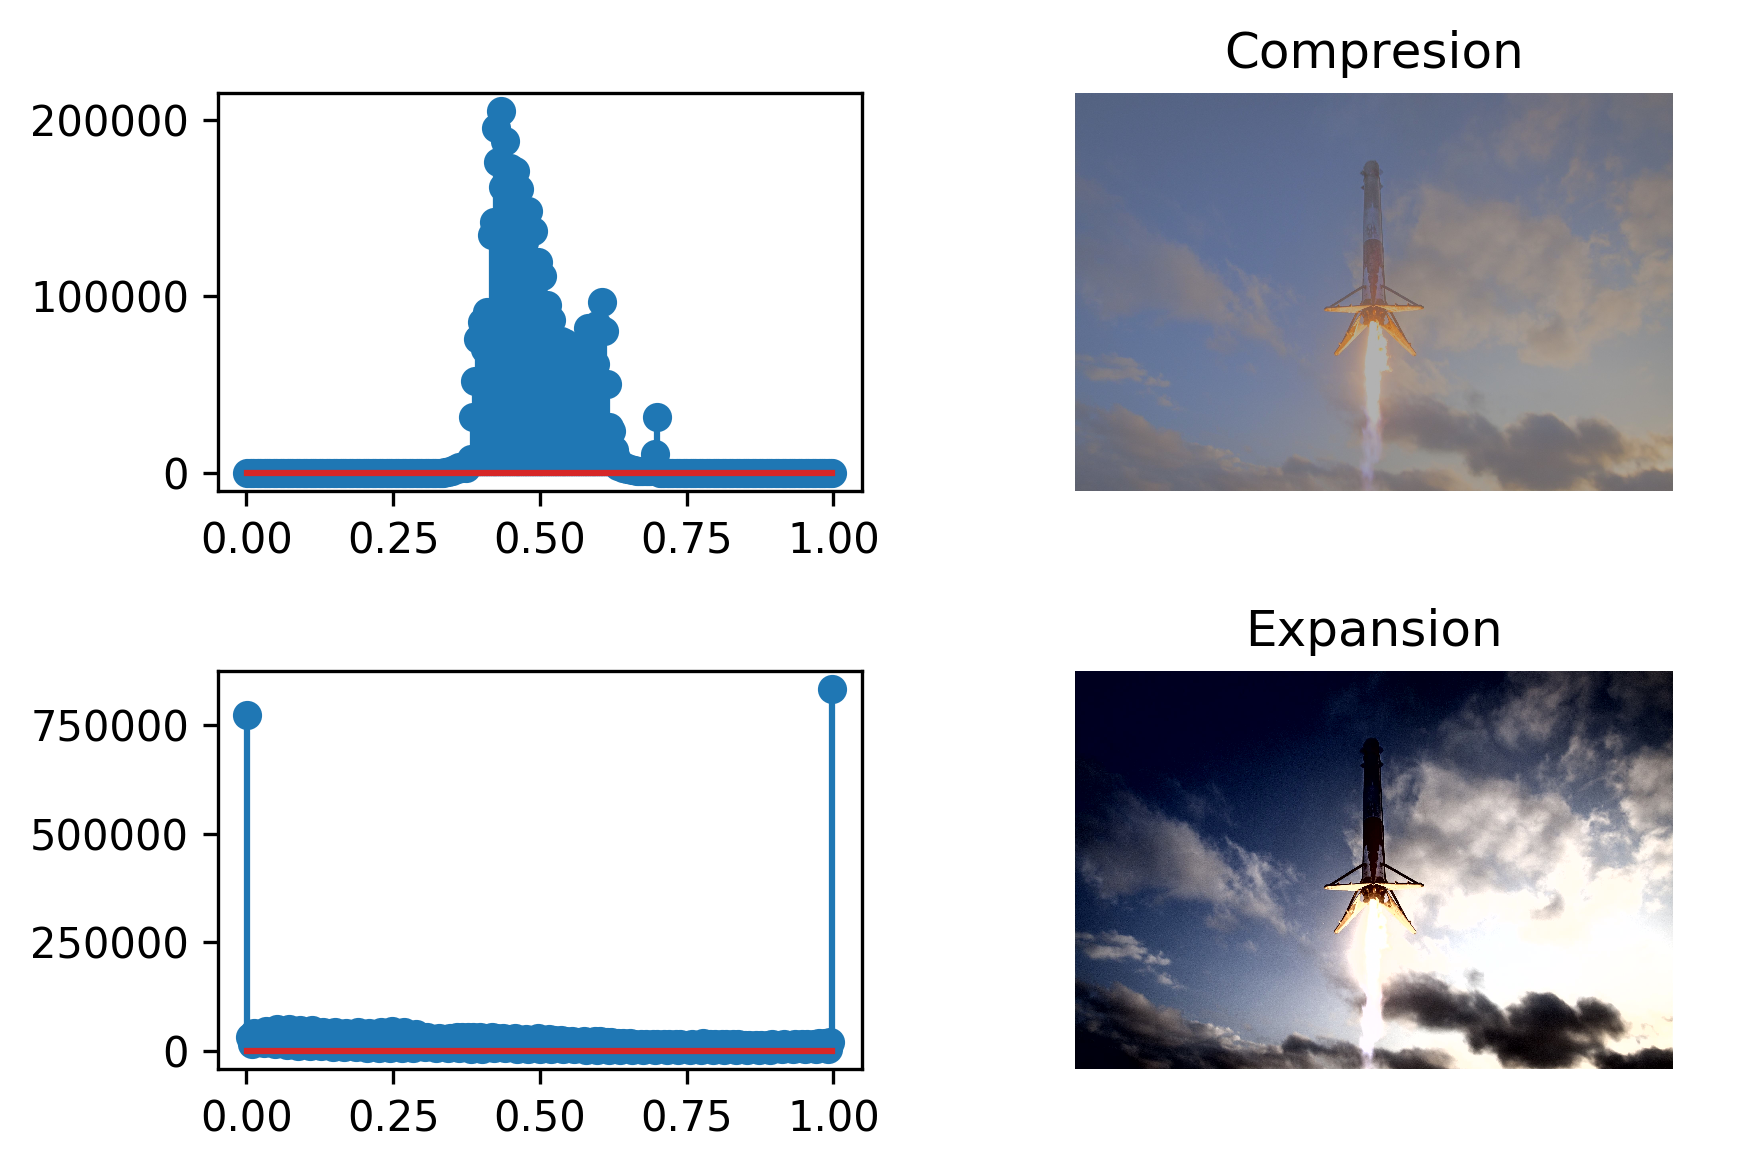

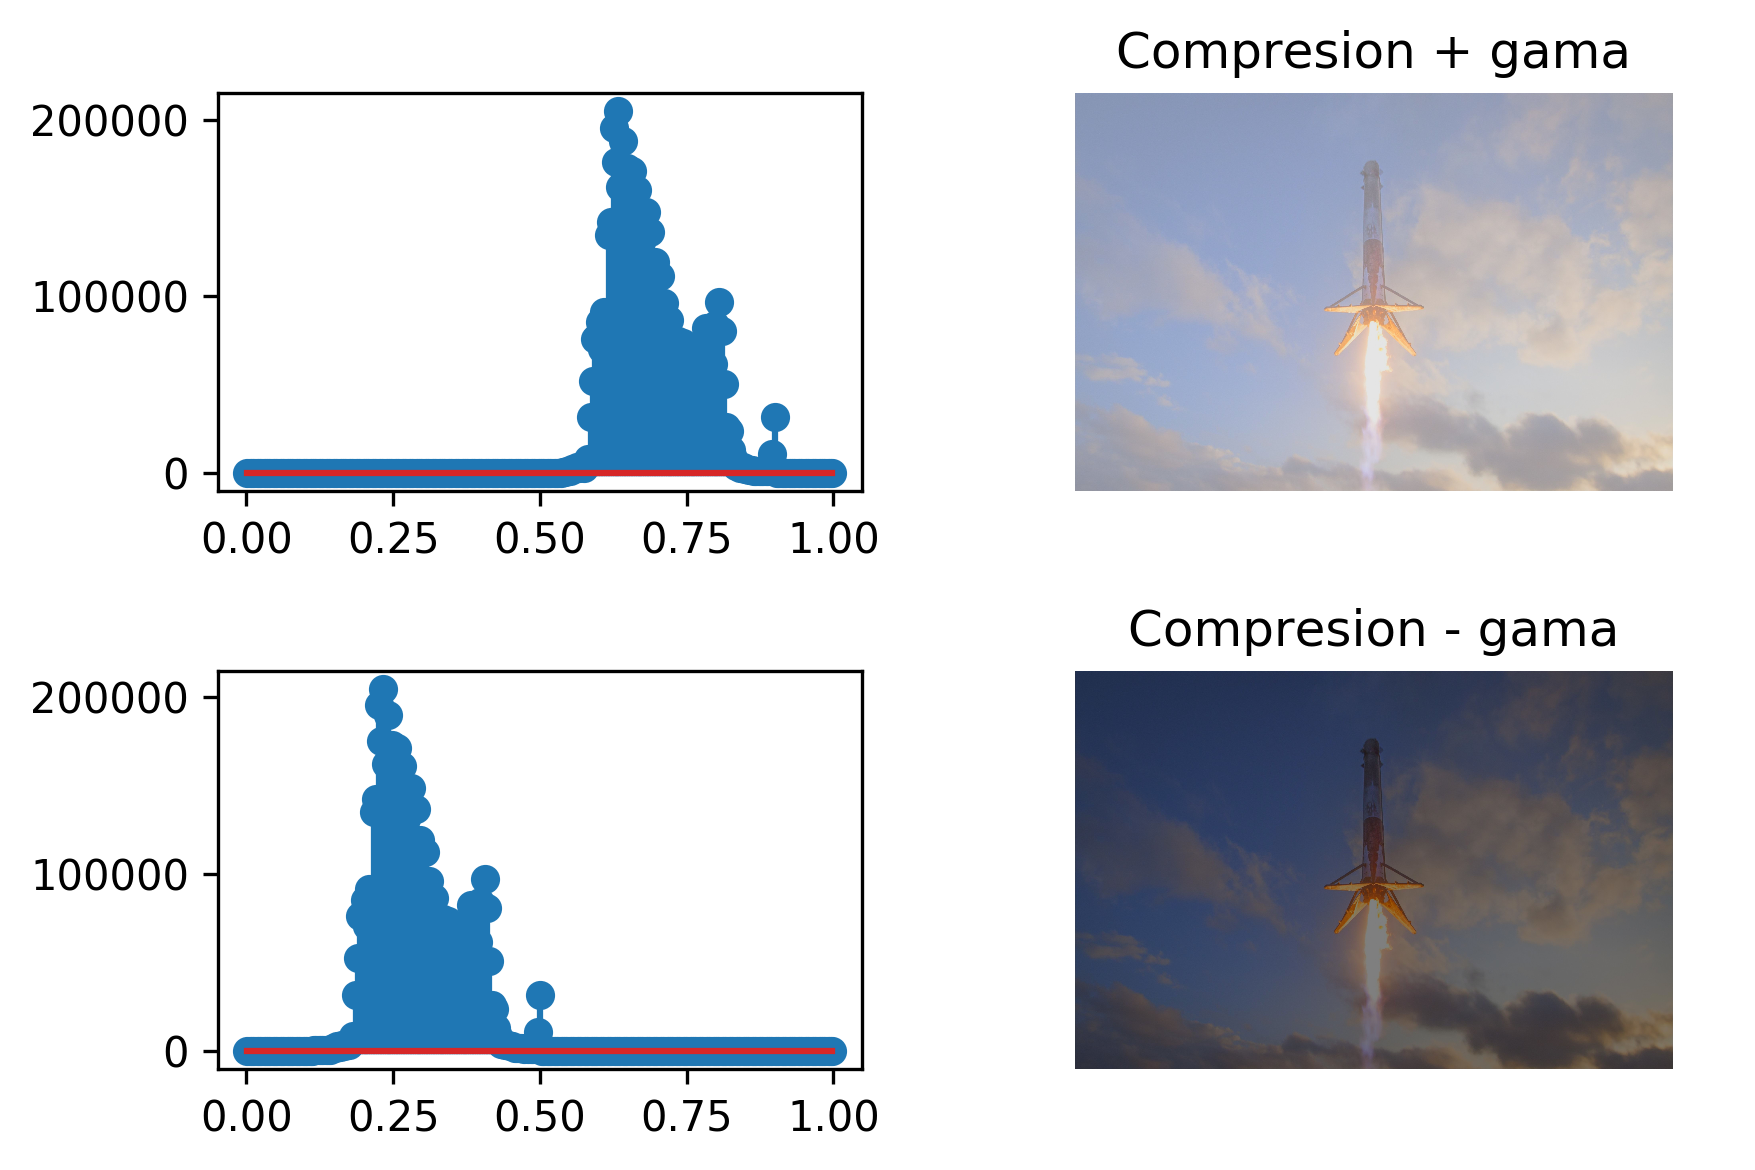

In [5]:
alfa = 0.3
beta = 0.7
gama = 0.2
# Comprimo todo el histograma entre alfa y beta
# alfa = 0 * a + b
# b = alfa
# beta = 1 * a + alfa
# a = beta - alfa
imag_yiq_compress = ophl.transformar_luminancia(imag_yiq, 0, 1, beta - alfa, alfa)
# Comprimo y muevo segun gama
imag_yiq_compress_pgama = ophl.transformar_luminancia(imag_yiq, 0, 1, beta - alfa, alfa, offset_base = gama)
# Comprimo y muevo segun -gama
imag_yiq_compress_ngama = ophl.transformar_luminancia(imag_yiq, 0, 1, beta - alfa, alfa, offset_base = -gama)

# expando entre alfa y beta
# 0 = alfa * a + b
# 1 = beta * a + b
# a = 1/(beta - alfa)
# b = -alfa/(beta - alfa)

imag_yiq_expansion = ophl.transformar_luminancia(imag_yiq, alfa, beta, 1/(beta - alfa), -alfa/(beta - alfa))






plt.figure(dpi=300)
ax = plt.subplot(2,2,1)
hist, bines = ophl.histogramear(imag_yiq_compress, bines_use)
ax.stem(bines, hist)
ax = plt.subplot(2,2,2)
imag_yiq_compress_RGB = espc.yiq2rgb(imag_yiq_compress)
ax.imshow(imag_yiq_compress_RGB)
plt.axis('off')
plt.title('Compresion')
ax = plt.subplot(2,2,3)
hist, bines = ophl.histogramear(imag_yiq_expansion, bines_use)
ax.stem(bines, hist)
ax = plt.subplot(2,2,4)
imag_yiq_expansion_RGB = espc.yiq2rgb(imag_yiq_expansion)
ax.imshow(imag_yiq_expansion_RGB)
plt.axis('off')
plt.title('Expansion')

plt.tight_layout()

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP3_comp_exp.png')
plt.savefig(nom_arch)

plt.show()


plt.figure(dpi=300)
ax = plt.subplot(2,2,1)
hist, bines = ophl.histogramear(imag_yiq_compress_pgama, bines_use)
ax.stem(bines, hist)
ax = plt.subplot(2,2,2)
imag_yiq_compress_pgama_RGB = espc.yiq2rgb(imag_yiq_compress_pgama)
ax.imshow(imag_yiq_compress_pgama_RGB)
plt.axis('off')
plt.title('Compresion + gama')
ax = plt.subplot(2,2,3)
hist, bines = ophl.histogramear(imag_yiq_compress_ngama, bines_use)
ax.stem(bines, hist)
ax = plt.subplot(2,2,4)
imag_yiq_compress_ngama_RGB = espc.yiq2rgb(imag_yiq_compress_ngama)
ax.imshow(imag_yiq_compress_ngama_RGB)
plt.axis('off')
plt.title('Compresion - gama')

plt.tight_layout()

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP3_comp_movida.png')
plt.savefig(nom_arch)

plt.show()

# Maximizar Rango Dinamico

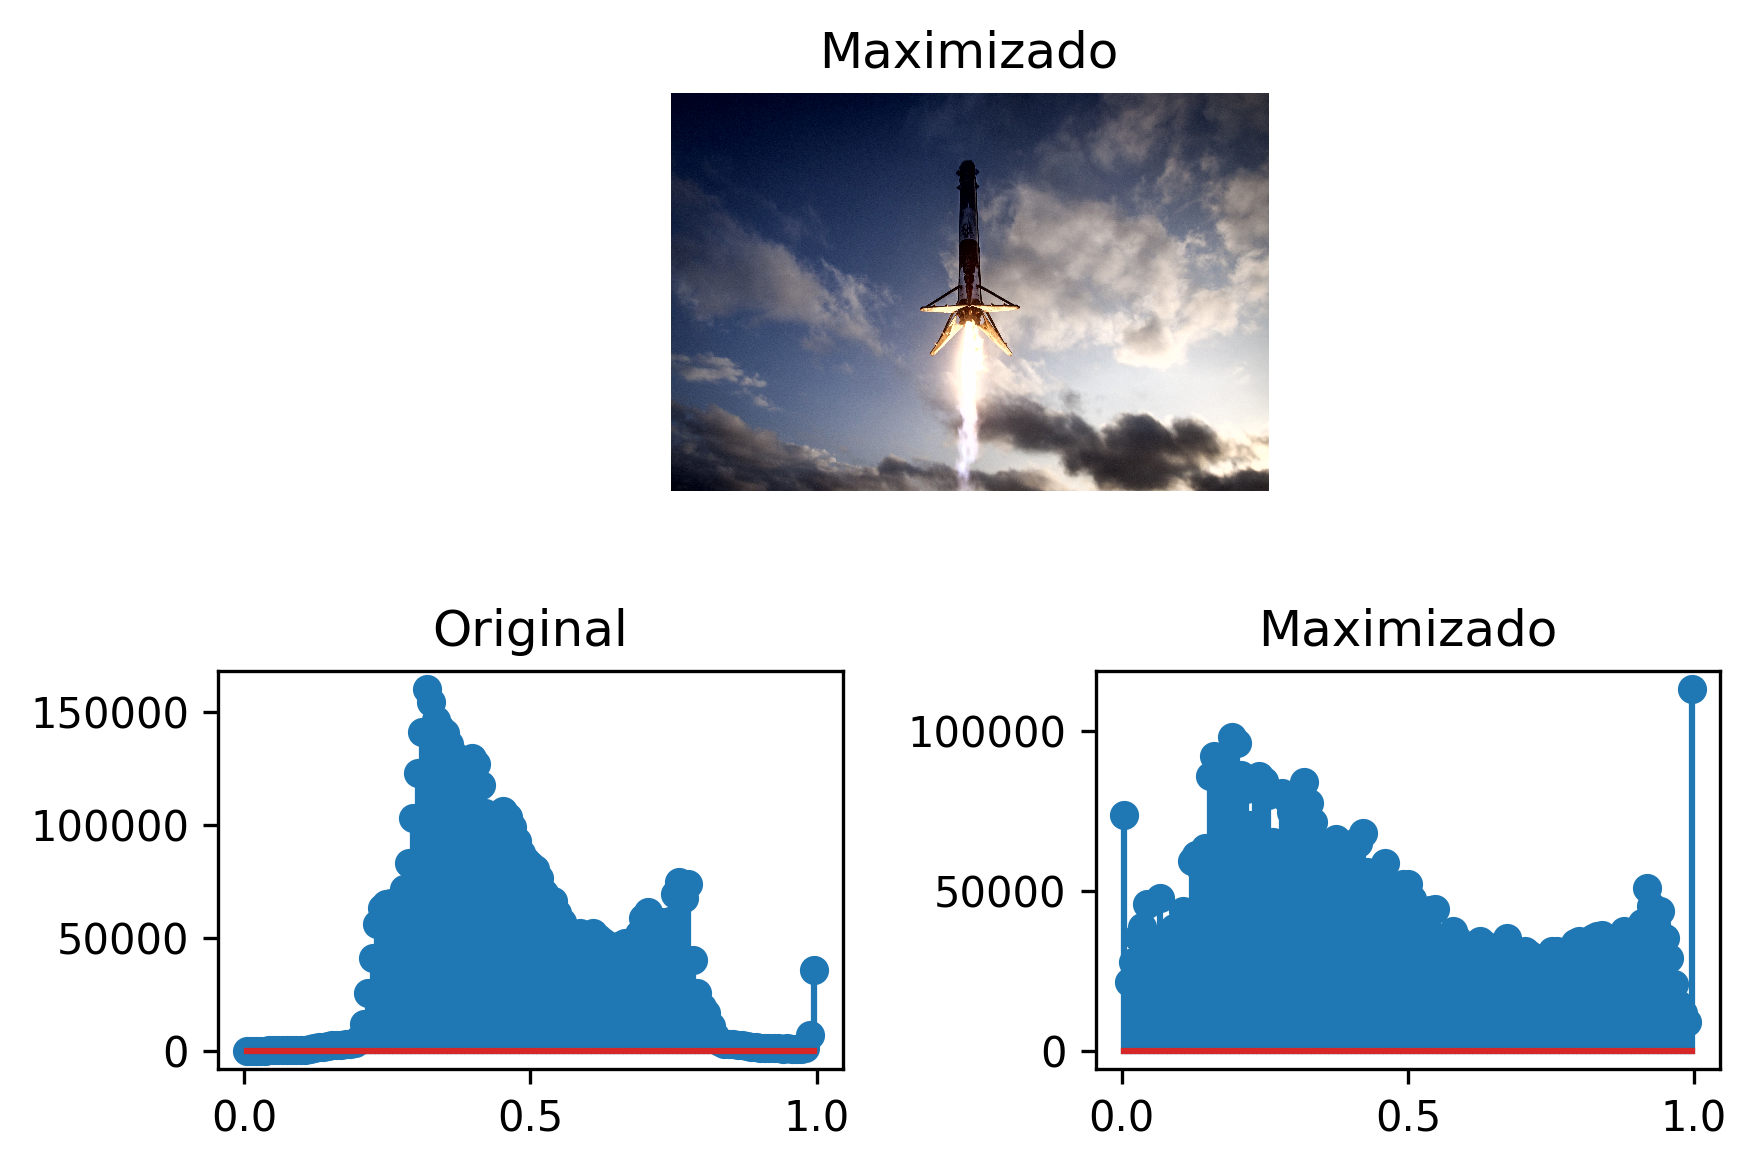

In [6]:
bines_use = 128

imag_yiq_maxim = ophl.maxim_rango_dinamico(imag_yiq, threshold = 0.1, bines = bines_use)
imag_yiq_maxim_RGB = espc.yiq2rgb(imag_yiq_maxim)


plt.figure(dpi=300)

ax = plt.subplot(2,1,1)
ax.imshow(imag_yiq_maxim_RGB)
plt.axis('off')
plt.title('Maximizado')

ax = plt.subplot(2,2,3)
hist, bines = ophl.histogramear(imag_yiq, bines_use)
ax.stem(bines, hist)
plt.title('Original')
ax = plt.subplot(2,2,4)
hist, bines = ophl.histogramear(imag_yiq_maxim, bines_use)
ax.stem(bines, hist)
plt.title('Maximizado')


plt.tight_layout()

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP3_hist_maxim.png')
plt.savefig(nom_arch)

plt.show()